### Plotting PTMs in Comet and PEAKS results using python for *Prochlococcus* MED4 benchmark study

Starting with:

    Peaks de novo results (.csv) of PTM-optimized sequencing
    Comet results from PTM-optimized database searches
    PeaksDB (de novo-assisted database searching) results of PTM-optimzed searching

Goal:

    Figures comparing the modifcation type and extent in database and de novo peptides
    
Using:

    - pandas
    - matplotlib

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

### Non NAAF-corrected PTMs and AAs

In [2]:
# read in csvs made in MED4-PeaksDB and MED4-Comet notebooks
# bringing in Comet > XCorr 3 and 2.5 and de novo peptides > 50% ALC and >80% ALC
# also reading in Peaks DB peptides >20 -logP

peaks50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_PTMopt_DN50_totals.csv")
peaks80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_PTMopt_DN80_totals.csv")
comet25 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_cometpmm25_totals.csv")
comet3 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_cometpmm3_totals.csv")
peaksdb = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB-PTMopt/RAL95_MED2_trypsin_combine_PeaksDBpsm_totals.csv")

frames = [peaks50, peaks80, comet25, comet3, peaksdb]
index = ['peaks50', 'peaks80', 'comet2.5', 'comet3', 'peaksdb']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with peaks and comet
names = ['peaks50', 'peaks80', 'comet2.5', 'comet3', 'peaksdb']
tot.insert(loc=0, column='data source', value=names)
tot.set_index('data source')

# separate out the dataframe into AAs and %PTMs, too
AA = tot[['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']].copy()

# no C since it's the same #ptm = tot[['% C w/ carb.', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth']].copy()
ptm = tot[['data source', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth']].copy()

ptm['total modified'] = tot['% M w/ oxid'] + tot['% N w/ deam'] + tot['% Q w/ deam'] + tot['% K w/ iron'] + tot['% K w/ meth'] + tot['% R w/ meth']

ptm.head()

,data source,% M w/ oxid,% N w/ deam,% Q w/ deam,% K w/ iron,% K w/ meth,% R w/ meth,total modified
0,peaks50,0.437152,0.181737,0.032968,0.084032,0.103463,0.303774,1.143126
1,peaks80,0.460325,0.221823,0.057234,0.019525,0.042467,0.203890,1.005263
2,comet2.5,0.304908,0.084605,0.086430,0.018646,0.010447,0.009026,0.514062
3,comet3,0.292821,0.066992,0.067926,0.007423,0.003459,0.003377,0.441998
4,peaksdb,0.378089,0.035752,0.029047,0.002704,0.026551,0.013584,0.485728


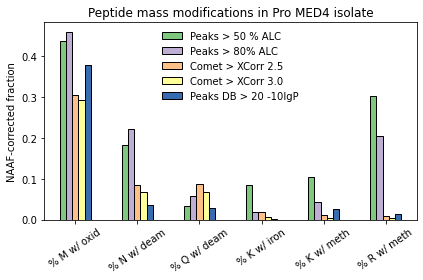

In [16]:
# plot mods

ptmds = ptm.drop(['data source'], axis=1)

ptmT = ptmds.T

ptmT.columns = ['Peaks > 50 % ALC', 'Peaks > 80% ALC', 'Comet > XCorr 2.5', 'Comet > XCorr 3.0', 'Peaks DB > 20 -10lgP']

#x_labels = ['Peaks 50 % ALC', 'Peaks 80% ALC', 'Comet XCorr 2.5', 'Comet > XCorr 3.0', 'Peaks DB > 20 -10lgP']

six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

ax = ptmT.iloc[0:6].plot(kind="bar", title = 'Peptide mass modifications in Pro MED4 isolate', color = seven_colors, edgecolor = 'black')
plt.xticks(rotation=35)
#ax.get_legend().remove()

ax.set_ylabel('NAAF-corrected fraction')
#ax.set_xlabel('mass modification type')
legend = plt.legend()
legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

plt.savefig("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/MED4_all5_ptms")

# also save in latex manuscript dir
plt.savefig("/home/millieginty/Documents/med-manuscripts/de-novo-etnp/rewrite-may2020/AGU/MED-AGU/MED4_all5_ptms", dpi = 300)

[Text(0, 0, 'Peaks 50 % ALC'),
 Text(0, 0, 'Peaks 80% ALC'),
 Text(0, 0, 'Comet > XCorr 2.5'),
 Text(0, 0, 'Comet > XCorr 3'),
 Text(0, 0, 'Peaks DB > 20 -10lgP')]

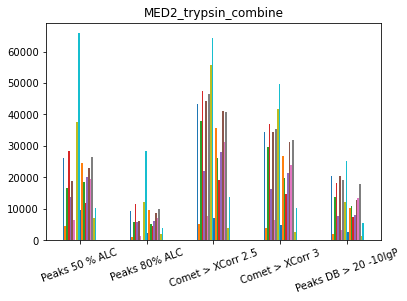

In [11]:
# bar plot of residue totals
# there is no isoleucine (I) in Peaks data, which is why L is really big and I is 0


x_labels = ['Peaks 50 % ALC', 'Peaks 80% ALC', 'Comet > XCorr 2.5', 'Comet > XCorr 3', 'Peaks DB > 20 -10lgP']


ax = AA.plot(kind="bar", title = 'MED2_trypsin_combine')
plt.xticks(rotation=20)
ax.get_legend().remove()
ax.set_xticklabels(x_labels)

### NAAF corrected PTMS and AAs

In [98]:
# read in csvs made in MED4-PeaksDN, MED4-PeaksDB and MED4-Comet notebooks NAAF corrected totals
# bringing in Comet > XCorr 3 de novo peptides >80% ALC
# also reading in Peaks DB peptides >20 -logP

peaks80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_DN80_NAAF_totals.csv")
comet3 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet3_NAAF_totals.csv")
peaksdb = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB-PTMopt/RAL95_MED2_trypsin_combine_PeaksDBpsm_NAAF_totals.csv")

frames = [peaks80, comet3, peaksdb]
index = ['peaks80', 'comet3', 'peaksdb']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with peaks and comet
names = ['peaks80', 'comet3', 'peaksdb']
tot.insert(loc=0, column='data source', value=names)
tot.set_index('data source')

# separate out the dataframe into AAs and %PTMs, too
NAAF_AA = tot[['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']].copy()

# no C since it's the same #ptm = tot[['% C w/ carb.', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth']].copy()
NAAF_ptm = tot[['data source', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth']].copy()

NAAF_ptm.head()

,data source,% M w/ oxid,% N w/ deam,% Q w/ deam,% K w/ iron,% K w/ meth,% R w/ meth
0,peaks80,0.666059,0.285542,0.038098,0.178624,0.243143,0.155600
1,comet3,0.196407,0.055786,0.037186,0.008633,0.006061,0.006967
2,peaksdb,0.321040,0.023652,0.014787,0.000141,0.012057,0.002308


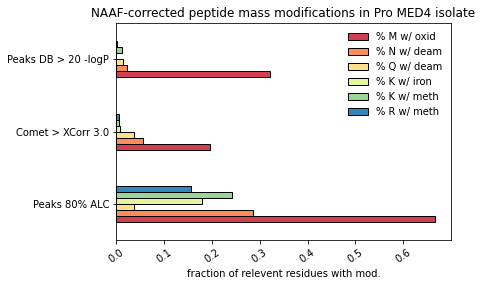

In [99]:
# bar plot of relative modifications

y_labels = ['Peaks 80% ALC', 'Comet > XCorr 3.0', 'Peaks DB > 20 -logP']

six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']

ax = NAAF_ptm.plot(kind="barh", title = 'NAAF-corrected peptide mass modifications in Pro MED4 isolate', color = six_colors, edgecolor = 'black')
plt.xticks(rotation=35)
#ax.get_legend().remove()
ax.set_yticklabels(y_labels)
ax.set_xlabel('fraction of relevent residues with mod.')
legend = plt.legend()
legend.get_frame().set_edgecolor('1.0')